In [14]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as panda
from patsy import dmatrices

In [109]:

pdf=panda.read_csv("c:/work/statis/cars/simple_large.csv")
pdf.head()
pdf1=pdf.loc[:,['cyl','expensive', 'bhp', 'vintage', 'origin']]
y, X = dmatrices('expensive ~ bhp+cyl+vintage+origin ', data=pdf1, return_type='dataframe')
mod = sm.OLS(y, X)  
res = mod.fit()  
print(res.summary())
sm.stats.linear_rainbow(res)


                            OLS Regression Results                            
Dep. Variable:              expensive   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     2.678
Date:                Wed, 30 Jan 2019   Prob (F-statistic):             0.0791
Time:                        22:43:16   Log-Likelihood:                -6.5948
No. Observations:                  18   AIC:                             23.19
Df Residuals:                      13   BIC:                             27.64
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1104      0.244      0.453      0.6

c:\users\c400133\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


(1.8406769559918774, 0.29146518881244077)

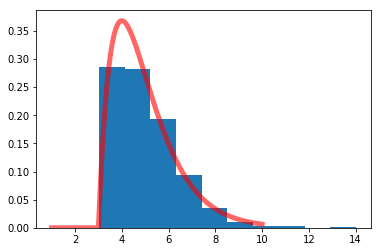

(array(5.), array(2.), array(1.41421356), array(3.))


In [45]:
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.stats import gamma, erlang, expon
fig, ax = plt.subplots(1, 1)
a = 4.427
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x = np.linspace(skewnorm.ppf(0.01, a),skewnorm.ppf(0.99, a), 100)
# ax.plot(x, skewnorm.pdf(x, a),'r-', lw=5, alpha=0.6, label='skewnorm pdf')
# distribution = scipy.stats.gamma(100,10, scale=10)
distribution = scipy.stats.erlang(2,3)
x = np.linspace(1,10, 1000)
ax.plot(x, distribution.pdf(x),'r-', lw=5, alpha=0.6, label='skewnorm pdf')
# ax.plot(x, scipty.stats.exp.pdf(x, 2,1,1),'r-', lw=5, alpha=0.6, label='skewnorm pdf')
sample = distribution.rvs(size=1000)
ax.hist(sample, density=True, bins=10)
plt.show()
print (distribution.stats('mvsk'))


In [92]:
from sklearn import datasets

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
train_data = panda.read_csv("c:/work/statis/cars/simple.csv")
test_data=panda.read_csv("c:/work/statis/cars/simple_test.csv")
print(train_data.head())
pdf_pairs_train = train_data.loc[:,['cyl','expensive']]
pdf_pairs_test = test_data.loc[:,['cyl','expensive']]
X = np.array(pdf_pairs_train.values)
X_t = np.array(pdf_pairs_test.values)
# print(X,X_t)
y = np.array([1, 1, 0, 0, 1700, 1,0])

y_pred = gnb.fit(X_t,y ).predict(X)
print(y_pred)
# print("Number of mislabeled points out of a total %d points : %d"
#       % (iris.data.shape[0],(iris.target != y_pred).sum()))

   origin  vintage  bhp  cyl  expensive
0       1        1    4    4          1
1       1        1    4    1          1
2       4        1    1    1          1
3       5        1    1    1          1
4       1        5    1    1          1
[   1 1700 1700 1700 1700 1700    0    0    0 1700    0]


In [108]:
from sklearn import svm
gnb = GaussianNB()
test_data = panda.read_csv("c:/work/statis/cars/simple.csv")
train_data=panda.read_csv("c:/work/statis/cars/simple_test.csv")
print(train_data.head())
pdf_pairs_test = train_data.loc[:,['cyl','expensive']]
pdf_pairs_train = test_data.loc[:,['cyl','expensive']]
X = np.array(pdf_pairs_test.values)
X_t = np.array(pdf_pairs_train.values)
# print(X,X_t)
y = np.array([1, 1, 1, 1700, 1, 1,0,0,0,1,0])
clf = svm.SVC(gamma='scale')
clf.fit(X_t, y)  
clf.predict(X)

   origin  vintage  bhp  cyl  expensive
0       3        3    2    2          1
1       3        2    1    1          1
2       2        1    2    1          0
3       2        2    2    2          0
4       3        1    1    1          1


array([1, 1, 0, 0, 1, 1, 0])

In [148]:
from sklearn import svm
gnb = GaussianNB()
test_data = panda.read_csv("c:/work/statis/cars/complex_test.csv")
train_data=panda.read_csv("c:/work/statis/cars/complex.csv")
print(train_data.head())
pdf_pairs_test = test_data.loc[:,['cyl','bhp','expensive']]
pdf_pairs_train = train_data.loc[:,['cyl','bhp','expensive']]
X = np.array(pdf_pairs_train.values)
X_t = np.array(pdf_pairs_test.values)
# print(X,X_t)
y = np.array(train_data.loc[:,['expensive']])
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
clf.predict(X_t)

   origin  vintage  bhp  cyl  expensive
0       1        1    4    4          0
1       1        1    4    1          0
2       4        1    1    1          0
3       5        1    1    1          0
4       1        5    1    1          0


c:\users\c400133\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

Optimization terminated successfully.
         Current function value: 0.647336
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.017 
Dependent Variable: expensive        AIC:              25.3041
Date:               2019-02-01 18:55 BIC:              26.1945
No. Observations:   18               Log-Likelihood:   -11.652
Df Model:           0                LL-Null:          -11.457
Df Residuals:       17               LLR p-value:      nan    
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     5.0000                                    
----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
cyl       0.3151     0.2633   1.1970   0.2313   -0.2009   0.8311

        Logit Marginal Effects       
Dep. Variable:              expensive
Method:           

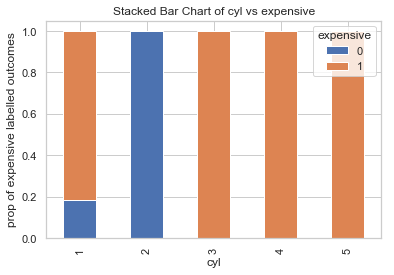

In [145]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pdf.cyl.unique()
pdf.groupby('cyl').mean()
table=panda.crosstab(pdf.cyl,pdf.expensive)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of cyl vs expensive')
plt.xlabel('cyl')
plt.ylabel('prop of expensive labelled outcomes')
plt.savefig('cyl vs expen')


logit_model=sm.Logit(pdf.expensive, pdf.cyl)
result=logit_model.fit()
print(result.summary2())
margeff = result.get_margeff()
print(margeff.summary())

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

X = np.array(pdf_pairs_test.values)
X_t = np.array(pdf_pairs_train.values)
# print(X,X_t)
y = np.array([1, 0, 1, 1700, 1700, 1700,0,0,0,1,0])
clf = svm.SVC(gamma='scale')
clf.fit(X_t, y)  
clf.predict(X)






array([1700, 1700,    0,    0, 1700,    1,    0])

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
test_data = panda.read_csv("c:/work/statis/cars/sum_train_large_v6.csv")
train_data=panda.read_csv("c:/work/statis/cars/sum_train_large_v6.csv")
# print(train_data.head())
pdf_result_col = train_data.loc[1800:25050,['F']]
pdf_pairs_train = train_data.loc[1800:25050,['A','B','C','D','E']]
pdf_pairs_test = train_data.loc[1:20,['A','B','C','D','E']]
X = np.array(pdf_pairs_train.values)
X_t = np.array(pdf_pairs_test.values)
y = np.array(pdf_result_col.values)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
print(train_data.loc[1:20,['F']])

print(clf.predict(X_t))
# Alogrithm used in data generation is 
# for a,b,c,d,e random nos 1-10
#  if ((a>3 and b>3)  or (c>8)) and (e<5):
#         f=1
#     elif  ((a>7 and b>8) or (e>8)):
#         f=2
#     else:
#         f=0

c:\users\c400133\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    F
1   0
2   0
3   0
4   0
5   1
6   0
7   1
8   0
9   2
10  2
11  1
12  0
13  0
14  2
15  0
16  0
17  2
18  0
19  0
20  0
[0 0 0 0 1 0 1 0 2 2 1 0 0 2 0 0 2 0 0 0]


In [176]:
from sklearn import svm
gnb = GaussianNB()

clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
clf.predict(X_t)

c:\users\c400133\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0],
      dtype=int64)